This is demo of variables.     
h5 file is coordinates of 13 points, and npy file is result.

___
#### First, let's see the 13 traces of tracking points.

In [38]:
import h5py    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = r'D:\_DataTemp\demo\full_video_FacemapPose.h5'
# h5 file is traces

f = h5py.File(filename, 'r+')
dset = f['Facemap']
keys = list(dset.keys())
print(f'Name of 13 Points are:{keys}')


Name of 13 Points are:['eye(back)', 'eye(bottom)', 'eye(front)', 'eye(top)', 'lowerlip', 'mouth', 'nose(bottom)', 'nose(r)', 'nose(tip)', 'nose(top)', 'nosebridge', 'paw', 'whisker(I)', 'whisker(II)', 'whisker(III)']


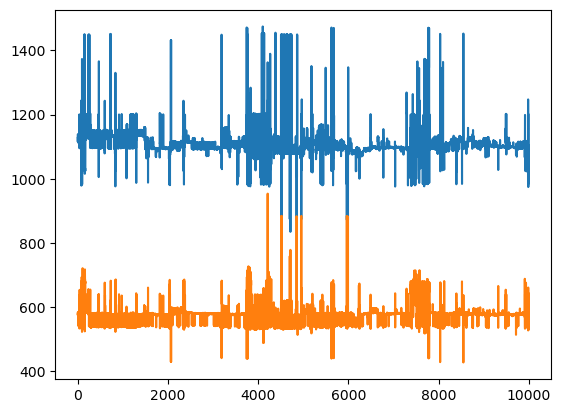

In [39]:
# show example of 1 whisker.
w1x = np.array(dset['whisker(I)']['x'])
w1y = np.array(dset['whisker(I)']['y'])

plt.plot(w1x[20000:30000])
plt.plot(w1y[20000:30000])
# f.close() # after loading all data, we need to close it.


___
#### Second, we will see the results generated.

In [40]:
# data format of this result is a little fuzzy.
results = np.load(r'D:\_DataTemp\demo\full_video_proc.npy',allow_pickle=True)
results  = results .flatten()[0]
# this result have multiple properties.
all_vars = list(results.keys())
print(f'All properties:{all_vars}')

All properties:['filenames', 'save_path', 'Ly', 'Lx', 'sbin', 'fullSVD', 'save_mat', 'Lybin', 'Lxbin', 'sybin', 'sxbin', 'LYbin', 'LXbin', 'avgframe', 'avgmotion', 'avgframe_reshape', 'avgmotion_reshape', 'motion', 'motSv', 'movSv', 'motMask', 'movMask', 'motMask_reshape', 'movMask_reshape', 'motSVD', 'movSVD', 'pupil', 'running', 'blink', 'rois', 'sy', 'sx']


<Axes: >

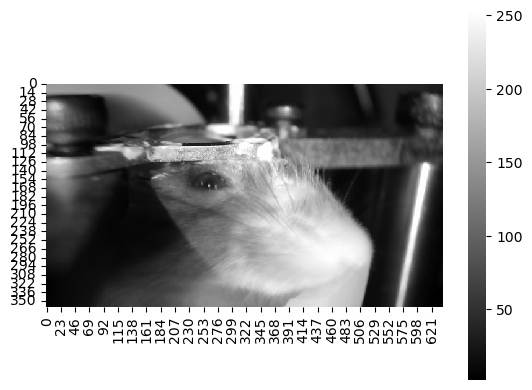

In [43]:
# average graph is avg frame.
avgframe = results['avgframe_reshape']
sns.heatmap(avgframe,square=True,cmap='gist_gray')

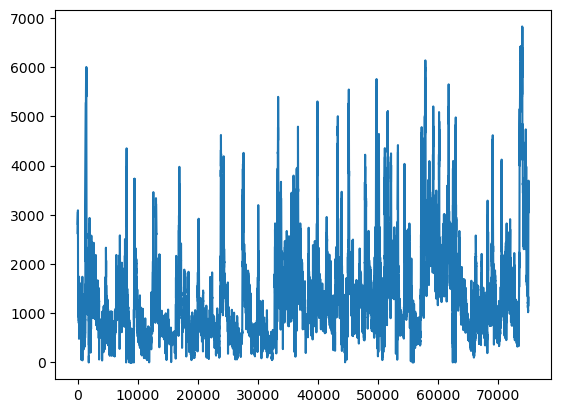

In [51]:
# pupil size
pupil_area = results['pupil'][0]['area']

plt.plot(pupil_area)

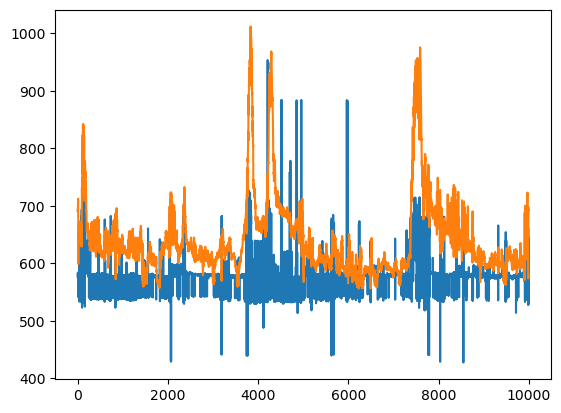

In [60]:
# Put pupil and whisker together, we can see they are correlated.
plt.plot(w1y[20000:30000])
plt.plot(pupil_area[20000:30000]/10+550)

In [69]:
# SVD will be empty if not correlated
results2 = np.load(r'D:\_DataTemp\demo\cutted_proc.npy',allow_pickle=True)
results2 = results2.flatten()[0]
mot_mask = results2['motMask_reshape'][1]
mov_mask = results2['movMask_reshape'][1]
mot_weights = results2['motSVD'][1]
mov_weights = results2['movSVD'][1]
# height*width*SVD 
print(f'SVD Shape:{mot_mask.shape}')
print(f'SVD Weights:{mot_weights.shape}')


SVD Shape:(225, 346, 500)
SVD Weights:(2400, 500)


Text(0.5, 1.0, 'Motion SVD')

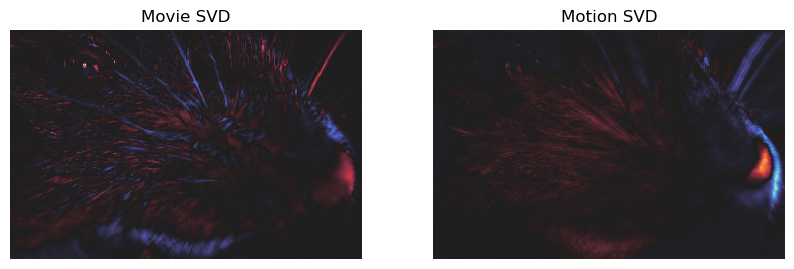

In [86]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize = (10,6))

sns.heatmap(mov_mask[:,:,2] ,ax = ax[0],square=True,center=0,xticklabels=False,yticklabels=False,cbar=False) # regardless of time info.
sns.heatmap(mot_mask[:,:,2] ,ax = ax[1],square=True,center=0,xticklabels=False,yticklabels=False,cbar=False) # consider time continous.
ax[0].set_title('Movie SVD')
ax[1].set_title('Motion SVD')


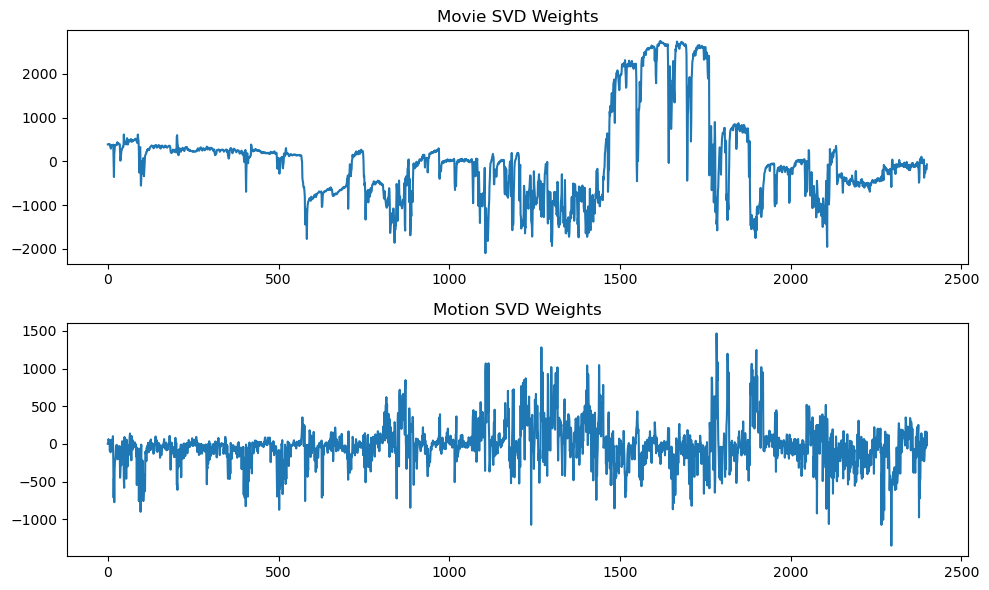

In [90]:
# and we can see time series changing.
fig,ax = plt.subplots(ncols=1,nrows=2,figsize = (10,6))

ax[0].plot(mov_weights[:,2])
ax[1].plot(mot_weights[:,2])

ax[0].set_title('Movie SVD Weights')
ax[1].set_title('Motion SVD Weights')

fig.tight_layout()